In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

file_csv = 'data.csv' # Cargo el archivo con los datos X1,X2 y Salida.

data = pd.read_csv(file_csv) # Guardo datos del archivo en una variable 

print("Tamaño archivo:",data.shape, "\n", "-------------------------", "\n", data)

# Lleno los datos X_test(x1,x2) y Y_test 
data = np.array(data)
#print(data)
X_test=[]
y_test=[]
for i in range(len(data)):
    X_test.append([data[i,0],data[i,1]])
    y_test.append([data[i,2]])

X_test = np.array(X_test) # Puntos de entrada 
y_test = np.array(y_test) # valor de clasificación 
print(y_test.shape,X_test.shape)

Tamaño archivo: (100, 3) 
 ------------------------- 
           X         W  b
0   0.78051 -0.063669  1
1   0.28774  0.291390  1
2   0.40714  0.178780  1
3   0.29230  0.421700  1
4   0.50922  0.352560  1
..      ...       ... ..
95  0.77029  0.701400  0
96  0.73156  0.717820  0
97  0.44556  0.579910  0
98  0.85275  0.859870  0
99  0.51912  0.623590  0

[100 rows x 3 columns]
(100, 1) (100, 2)


In [28]:
"""PARAMETROS INICIALES DEL PERCEPTRON PESOS Y BIAS"""
W_test = np.random.uniform(0,10,size=(2,1))
b_test = np.random.uniform(0,10)
print("Pesos y Bias iniciales:", "\n",
      "Pesos: ",W_test[0,:],W_test[1,:],"Bias: ",b_test)

Pesos y Bias iniciales: 
 Pesos:  [3.74540119] [9.50714306] Bias:  7.319939418114051


In [29]:
"""FUNCIONES PARA UDAR EN EL EJERCICIO"""
#----- Funcion Score ------
def score(X, W, b):
    return (np.matmul(X, W))+b
# ----Funcion sigmoid -----
def sigmoid(x):
    return (1)/(1+np.exp(-x))
# ----Funcion del error ------
def error_func(y, p, m):
    return -(1/m)*np.sum((1-y)*(np.log(1-p))+y*np.log(p))
# ---Funcion del gradiente
def gradiente_ajuste(X, W, b, y, p, lr):
    for i in range(len(X)):
        for j in range(len(W)):
            W[j, :] = W[j, :] - lr*(p[i, :]-y[i, :])*X[i, j]
            b = b - lr*(p[i, :]-y[i, :])
    return W, b

In [30]:
""" CALCULO DEL SCORE Y PROBABILIDAD """
pro = score(X_test, W_test, b_test)  # Score
pred = sigmoid(pro)  # Prababilidades de los score

# Se calcula el error de los puntos y del test
error = error_func(y_test, pred, len(X_test))
print('El error de la primera prediccion es: ', error)

El error de la primera prediccion es:  8.267602572378923


In [31]:
""" AJUSTE DE LOS PESOS Y BIAS y ERROR"""

# Se ajustan los pesos y bias y el error con el gradiente
W_a, b_a = gradiente_ajuste(X_test, W_test, b_test, y_test, pred, 0.08)
#Se vuelve a calcular la prediccion con los nuevos pesos y bias
pred1 = sigmoid(score(X_test, W_a, b_a))  # Probabiliades de lso puntos
# Se calcula nuevamente el error para mirar si el algoritmo mejoro la predicción
error1 = error_func(y_test, pred1, len(X_test))

# Se imprimen los resultados al aplicar el algoritmo del gradiente y el error de la segunda predicción
print('Error despues de aplicar descenso del gradiente: ', error1)
print("Pesos y bias ajustados", "\n", "Pesos:",W_a[0, :], W_a[1, :], "\n", "Bias:", b_a)

# ------Tercer intetno para bajar el error y aplicar el algoritmo del gradiente
W_f, b_f = gradiente_ajuste(X_test, W_a, b_a, y_test, pred1, 0.02)
pred2 = sigmoid(score(X_test, W_f, b_f))
error2 = error_func(y_test, pred2, len(X_test))

print('Error despues de aplicar descenso del gradiente: ', error2)
print("Pesos y bias ajustados", "\n", "Pesos:",W_f[0, :], W_f[1, :], "\n", "Bias:", b_f)


Error despues de aplicar descenso del gradiente:  2.4580254084722934
Pesos y bias ajustados 
 Pesos: [1.00110663] [6.711114] 
 Bias: [-0.67985899]
Error despues de aplicar descenso del gradiente:  1.5913069827807862
Pesos y bias ajustados 
 Pesos: [0.38023449] [6.05529385] 
 Bias: [-2.31548808]


(3, 100) 3


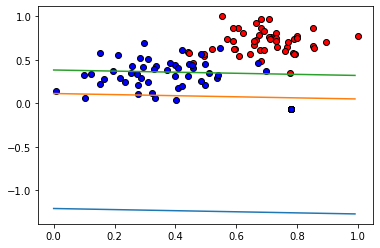

In [32]:
"""GRAFICAS DEL EJERCICIO"""
x1 = np.arange(0, 1, 0.01)  # vector pountos para la recta
# Se crean las rectas de decision con los resultados del ejercicio y se guardan en un array
rectas = np.array([-(1/W_test[1, :])*(W_test[0, :]*x1+b_test), -
        (1/W_a[1, :])*(W_a[0, :]*x1+b_a), -(1/W_f[1, :])*(W_f[0, :]*x1+b_f)])

print(rectas.shape, len(rectas))

# Se establecen las clases de los puntos y se difrencias con un color
red_point = data[np.argwhere(y_test == 0).flatten()]
blue_point = data[np.argwhere(y_test == 1).flatten()]
# Se grafican los puntos y las rectas para visualizar los resultados del ejercicio
plt.scatter(red_point[:, 0], red_point[:, 1], color="red", edgecolors='k')
plt.scatter(blue_point[:, 0], blue_point[:, 1], color="blue", edgecolors='k')
plt.plot(x1, rectas[0, :])
plt.plot(x1, rectas[1, :])
plt.plot(x1, rectas[2, :])


------------------------------ Epoca 1 ----------------------------------------- 
Pesos: [-11.77564426][-12.17054287] ---- Bias: [7.33053362] ---- Train_loss: 0.945284405260118
------------------------------ Epoca 2 ----------------------------------------- 
Pesos: [-10.74580577][-11.15981897] ---- Bias: [12.316888] ---- Train_loss: 0.1627441148343904
------------------------------ Epoca 3 ----------------------------------------- 
Pesos: [-10.96776498][-11.38125797] ---- Bias: [11.57626666] ---- Train_loss: 0.14451931902387494
------------------------------ Epoca 4 ----------------------------------------- 
Pesos: [-10.9395399][-11.35586272] ---- Bias: [11.74774257] ---- Train_loss: 0.14364401238351543
------------------------------ Epoca 5 ----------------------------------------- 
Pesos: [-10.95934802][-11.37843326] ---- Bias: [11.73577308] ---- Train_loss: 0.1435564439003006
------------------------------ Epoca 6 ----------------------------------------- 
Pesos: [-10.97072032][-11.

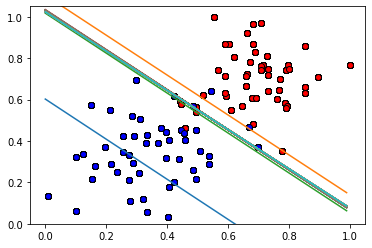

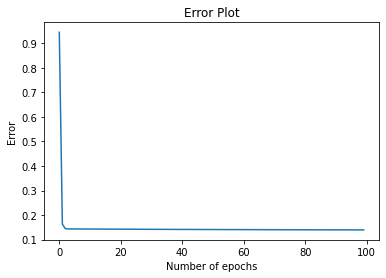

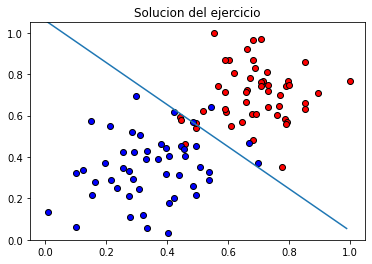

In [36]:
"""ENTRENAMIENTO DEL PERCEPTRON""" 
epoch = 100 # Epocas de entrenamiento
comodin = 1 # variable para controlar la primera vez que entra al entrenamiento con los párametros iniciales
W, b, loss = [], [], [] # listas para llenar pesos y el resultado del error
for i in range(epoch):
    if comodin == 1:
        comodin = 0
        W, b = gradiente_ajuste(X_test, W_test, b_test, y_test, pred, 0.08)
        pred = sigmoid(score(X_test, W, b))  # se calcula la prediccion
        error = error_func(y_test, pred, len(X_test))  # se calcula el error
        # error = error_func(y_test, pred)  # se calcula el error
        loss.append(error)  # Se guardan los errores del entrenamiento
    else:
        # ------------ implementación de los algoritmos --------------------------
        # saco los pesos y bias del ajuste con gradiente
        W, b = gradiente_ajuste(X_test, W, b, y_test, pred, 0.08)
        pred = sigmoid(score(X_test, W, b))  # se calcula la prediccion
        error = error_func(y_test, pred, len(X_test))  # se calcula el error
        # error = error_func(y_test, pred)  # se calcula el error
        loss.append(error)  # Se guardan los errores del entrenamiento

    print('------------------------------ Epoca {} ----------------------------------------- '.format(i+1))
    print(
        "Pesos: {}{} ---- Bias: {} ---- Train_loss: {}".format(W[0, :], W[1, :], b, error))

    rectas = -(1/W[1])*(W[0]*x1+b)  # Rectas del entrenamiento
    plt.plot(x1, rectas)
    plt.ylim(0, 1.05)
    plt.scatter(red_point[:, 0], red_point[:, 1], color="red", edgecolors='k')
    plt.scatter(blue_point[:, 0], blue_point[:, 1],color="blue", edgecolors='k')

# Grafica del Error
plt.figure()
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(loss)
plt.show()

# Solución del ejercicio
plt.figure()
plt.title("Solucion del ejercicio")
plt.plot(x1, -(1/-11.35513683)*(-11.51829679*x1+12.0242339))
plt.ylim(0, 1.05)
plt.scatter(red_point[:, 0], red_point[:, 1], color="red", edgecolors='k')
plt.scatter(blue_point[:, 0], blue_point[:, 1],color="blue", edgecolors='k')